In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import seaborn as sns
import numpy as np
import holoviews as hv
import datashader as ds
import dask as dask
import bokeh as bokeh

# Standard plotly imports
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import os
from IPython.display import Image

# Objectives

The aim of the study is to: (I). deliver a working guidelines and essential considerations while developing and executing applicable CP, and (II). explore which approaches and clinical pathways (the plan of care) instrument is available in the context of a limited resource setting.

# Database  

PubMed, Web of Science, Google Scholar 


    


# Keywords

clinical pathway in low resource setting, Clinical Pathways, computerized  clinical pathway and guideline practice, applicable clinical pathway, CDSS in low resource settings, Patient flow  in low resource setting, low resource point of care instrument , clinical decision support system pathway or plan of care construction  

# Sate of the Art Summary

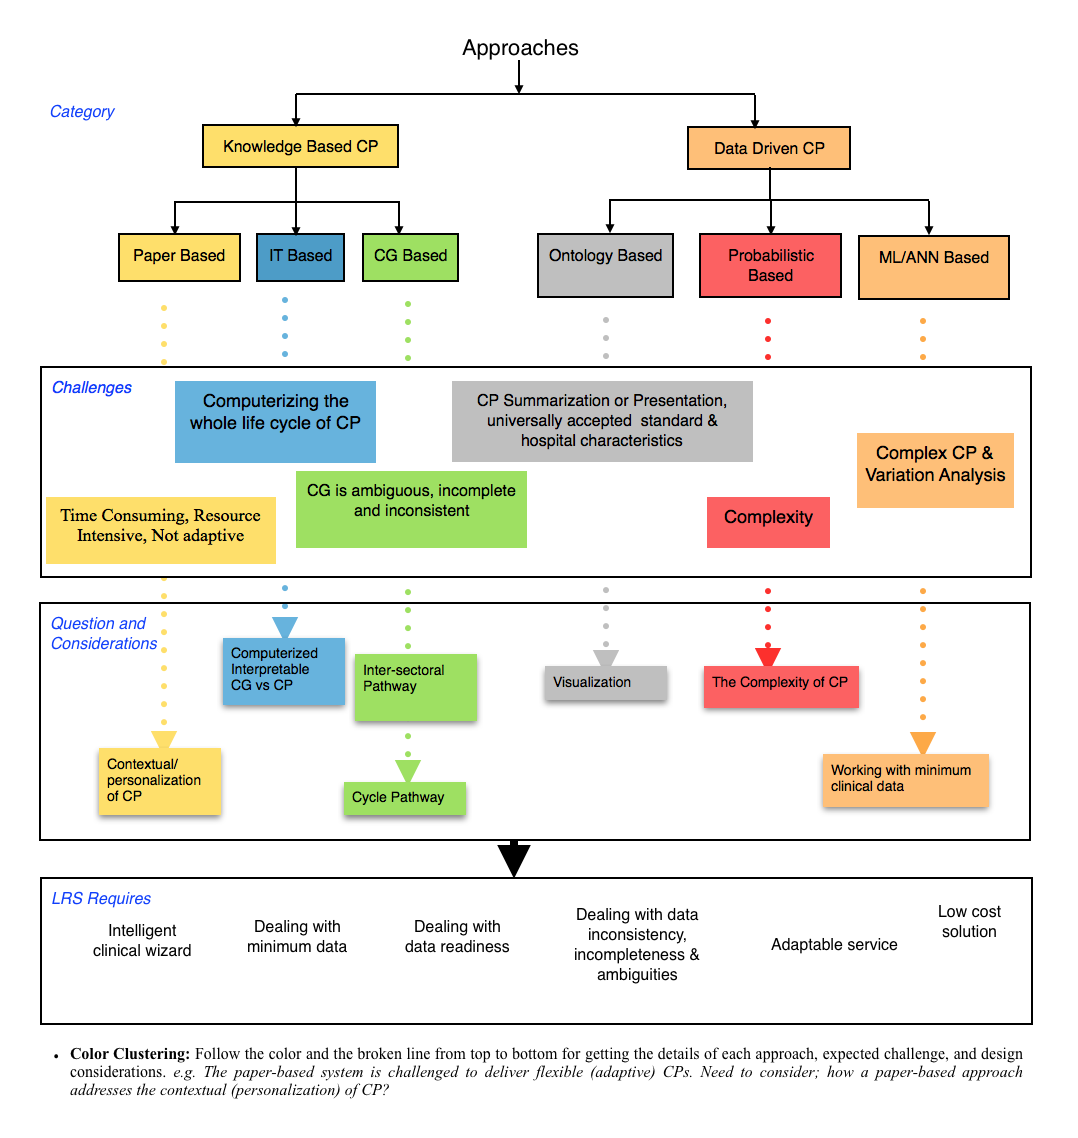

In [2]:
Image(filename='CPExecutionDiagram1.png') 

# Study Work Flow Digarm

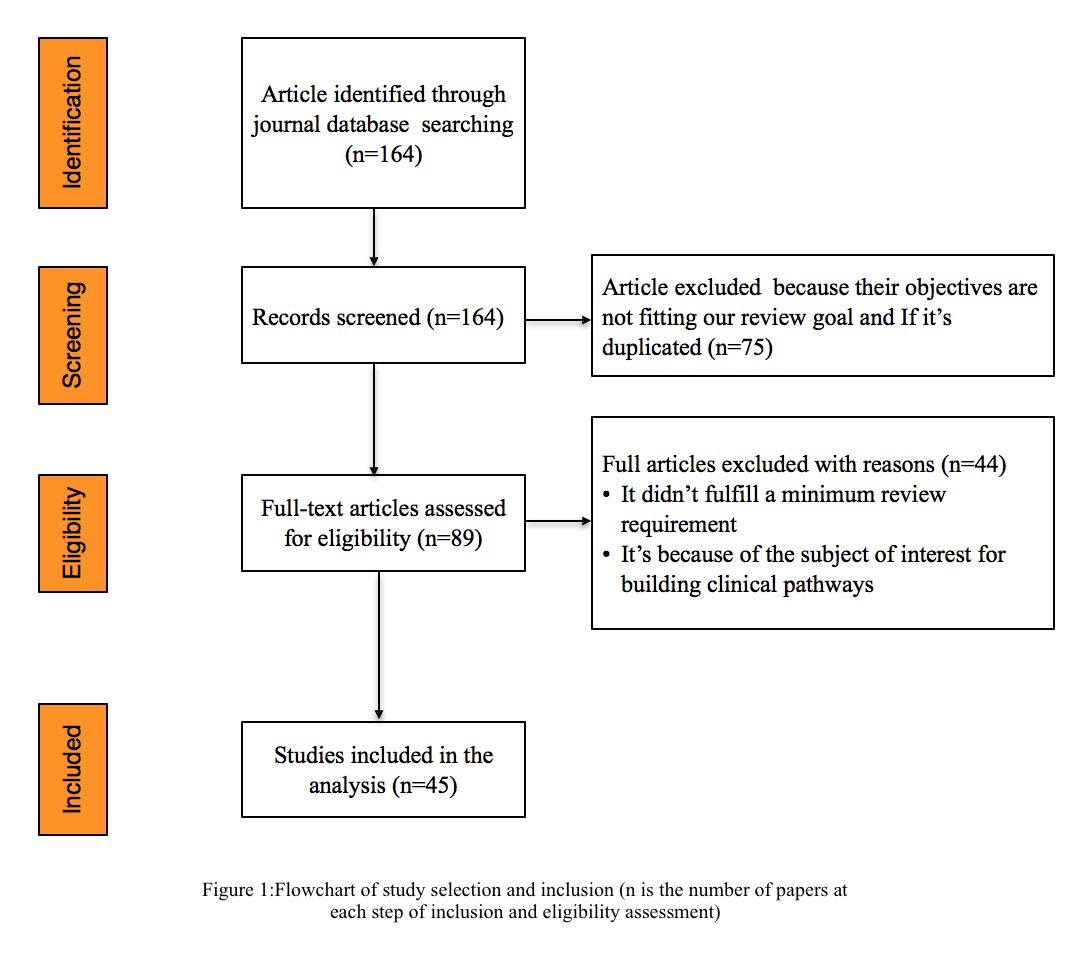

In [3]:
Image(filename='StudyFlow.png') 

After exploring different kinds of literature: (I). We cluster into knowledge-based and data-driven CP based on their principles, approaches, and strategies, (II). Extract the most important consideration for designing successful and applicable CDSS-CP and (III). Derive the expected benefit of implementing in LRS. We also map those techniques in the literature that have been identified with the point of care executable platforms.

In [2]:
#reflist = pd.read_csv("Referrence_List.csv", encoding='utf-8')

#update after the comment 
#reflist = pd.read_csv("FinalReference2-Table 1.csv", encoding='utf-8')

#after Web of science review 
reflist = pd.read_csv("ReferenceDataF1.csv", encoding='utf-8')


In [5]:
reflist.shape

(45, 13)

# Summary of the characteristics of included studies

### Summary of the approaches

In [6]:
reflist['Approaches'].value_counts() 

Knowledge based     25
Data driven         20
Name: Approaches, dtype: int64

In [7]:
reflist['Approaches'].value_counts(normalize=True) * 100

Knowledge based     55.555556
Data driven         44.444444
Name: Approaches, dtype: float64

### Summary by platforms 

In [22]:
reflist['Platform'].value_counts() 

Integrated into HR                         15
Standalone APP                             11
Paper Based (including phone follow up)    10
WEB APP                                     9
Name: Platform, dtype: int64

In [23]:
reflist['Platform'].value_counts(normalize=True) * 100

Integrated into HR                         33.333333
Standalone APP                             24.444444
Paper Based (including phone follow up)    22.222222
WEB APP                                    20.000000
Name: Platform, dtype: float64

#### Filter those followed know-ledge based approaches and summarize the distrbution

In [10]:
kbReflist = reflist[reflist['Approaches']=='Knowledge based ']
kbReflist.shape

(25, 13)

#### Know-ledge based approaches and executed platforms

In [11]:
kbReflist['Platform'].value_counts()

Standalone APP                             9
Paper Based (including phone follow up)    9
WEB APP                                    6
Integrated into HR                         1
Name: Platform, dtype: int64

In [12]:
#replacing a single value
kbReflist['Platform'].replace(to_replace=["Integrated into HR"],
           value=["Paper Based (including phone follow up)"],
           inplace=True
          )
kbReflist['Platform'].value_counts()

Paper Based (including phone follow up)    10
Standalone APP                              9
WEB APP                                     6
Name: Platform, dtype: int64

In [13]:
kbReflist['Platform'].value_counts(normalize=True) * 100

Paper Based (including phone follow up)    40.0
Standalone APP                             36.0
WEB APP                                    24.0
Name: Platform, dtype: float64

#### Filter those followed data-driven approaches and summarize the distribution

In [17]:
ddReflist = reflist[reflist['Approaches']=='Data driven ']
ddReflist.shape

(20, 13)

In [18]:
ddReflist['Platform'].value_counts()

Integrated into HR                         14
WEB APP                                     3
Standalone APP                              2
Paper Based (including phone follow up)     1
Name: Platform, dtype: int64

In [19]:
ddReflist.columns = ddReflist.columns.str.replace(' ', '')

In [20]:
#replacing a single value
ddReflist['Platform'].replace(to_replace=["Paper Based (including phone follow up)"],
           value=["Integrated into HR"],
           inplace=True
          )
ddReflist['Platform'].value_counts()

Integrated into HR    15
WEB APP                3
Standalone APP         2
Name: Platform, dtype: int64

#### Data-driven approaches and executed platforms

In [21]:
ddReflist['Platform'].value_counts(normalize=True) * 100

Integrated into HR    75.0
WEB APP               15.0
Standalone APP        10.0
Name: Platform, dtype: float64

In [22]:
xx = ddReflist.groupby(['Approaches','Platform', 'Techniques']).size().reset_index().rename(columns={0:'Number_of_Studies'})
xx#.to_csv('tocsv2021.csv')

,Approaches,Platform,Techniques,Number_of_Studies
0,Data driven,Integrated into HR,"CP learning algorithm and clustering, Markov c...",1
1,Data driven,Integrated into HR,"Compare and contrast,follow up, review, interv...",1
2,Data driven,Integrated into HR,Frequent sequence mining algorithm & visualiz...,1
3,Data driven,Integrated into HR,Hierarchical task networks or Hierarchical clu...,1
4,Data driven,Integrated into HR,Hybrid learning algorithm,1
5,Data driven,Integrated into HR,K-means with Levenshtein distance \n,1
6,Data driven,Integrated into HR,Neural network,1
7,Data driven,Integrated into HR,Probabilistic,1
8,Data driven,Integrated into HR,"Rule Based or Fuzzy rule, extended fuzzy Petri...",2
9,Data driven,Integrated into HR,Statistical machine-learning algorithms \n,1


### Summary by journals

In [180]:
reflist['Journal'].value_counts(normalize=True) * 100

Elsevier                                                   22.222222
BMC                                                        15.555556
Springer                                                   11.111111
IEEE                                                        8.888889
Malaysian Journal of Fundamental and Applied Sciences       4.444444
JMIR                                                        4.444444
Psycho-oncology                                             2.222222
Procedia computer science                                   2.222222
Computers in nursing                                        2.222222
HEALTHINF                                                   2.222222
The American journal of managed care                        2.222222
Journal of evaluation in clinical practice                  2.222222
Internet Journal of Allied Health Sciences and Practice     2.222222
Journal of Korean Neurosurgical Society                     2.222222
Journal of medical systems        

In [181]:
# reflist['Approaches'].describe()
reflist.groupby('Approaches').count()

,Title,Author,Journal,Year,Citations,Settings,Techniques,Context,Mechanism_and_Intervention_strategies,Platform,Outcome_and_Lesson,Possibility_to_adopt_in_LRS
Approaches,,,,,,,,,,,,
Data driven,20,20,20,20,20,19,20,20,20,20,19,18
Knowledge based,25,25,25,25,25,25,25,25,24,25,23,20


In [182]:
# reflist[reflist['Citations'] > 10].count() 
vc = reflist.Citations.value_counts()
vc[vc>1]

1     4
12    4
10    3
3     3
2     2
4     2
8     2
20    2
50    2
Name: Citations, dtype: int64

# Referrence Viz.

In [183]:
@interact
def show_referral_by_Citations(column="Citations",x=80):
    return reflist.loc[reflist[column] >x]

,Title,Author,Journal,Year,Citations,Settings,Techniques,Context,Mechanism_and_Intervention_strategies,Approaches,Platform,Outcome_and_Lesson,Possibility_to_adopt_in_LRS
19,Comparing computer-interpretable guideline mod...,Peleg et al. (2003),Journal of the American Medical Informatics As...,2003,681,cough and hypertension,Automation,Trying to build computer interpretable CGs,Compare six existing clinical knowledge repres...,Knowledge based,Standalone APP,Different model experimentation is performed t...,Yes


In [22]:
def get_publication_by(reflist, journal, volume):
    journal_info= reflist 
    for journal in journal.split():
        journal_info = journal_info[journal_info['Journal'].str.contains(journal, case='False')]
    volume_info = journal_info[journal_info['Volume']==volume]
    return volume_info

In [23]:
# reflist["Citations"].describe()
reflist["Year"].value_counts()

2018    7
2015    6
2016    5
2014    5
2012    5
2017    3
2001    2
2008    2
2013    2
2009    1
2007    1
2005    1
2003    1
2000    1
1998    1
1993    1
1992    1
Name: Year, dtype: int64

Text(0.5, 1.0, 'Number of Studies VS Publication Year')

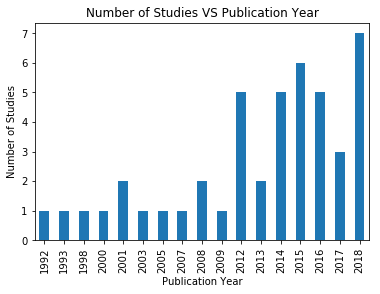

In [24]:
reflist["Year"].value_counts()
reflist.groupby('Year').size().plot(kind='bar',width=0.5, figsize=(6,4))
plt.xlabel("Publication Year")
plt.ylabel("Number of Studies")
plt.title("Number of Studies VS Publication Year")

Text(0.5, 1.0, 'Number of Studies VS Citations')

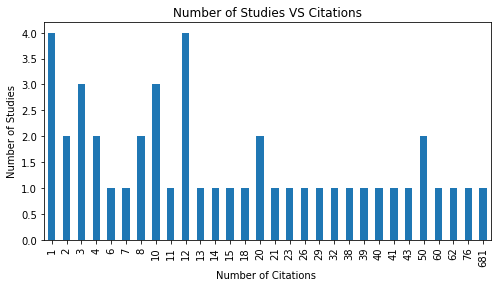

In [8]:
reflist["Citations"].value_counts()
reflist.groupby('Citations').size().plot(kind='bar',width=0.5, figsize=(8,4))
plt.xlabel("Number of Citations ")
plt.ylabel("Number of Studies")
plt.title("Number of Studies VS Citations")

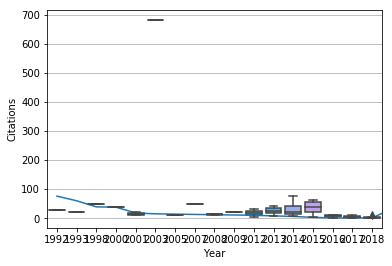

In [27]:
#reflist["Citations"].value_counts()
YearCitations = reflist.filter(['Year','Citations'], axis=1)
YearCitations
#plt.plot(YearCitations.Year, YearCitations.Citations, color='tab:red')
df = YearCitations[YearCitations.Citations == 0]

YearCitations['Citations'].plot(grid = True)
sns.boxplot(x='Year', y='Citations', data=YearCitations)

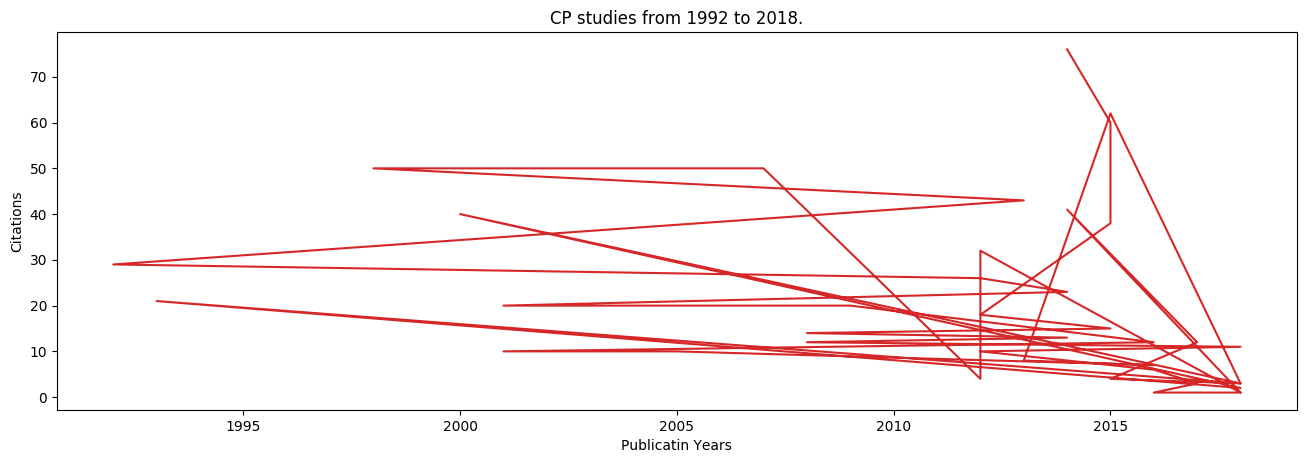

In [29]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Publicatin Years', ylabel='Citations', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

xx = reflist[reflist['Citations'] < 80]

plot_df(xx, x=xx.Year, y=xx.Citations, title='CP studies from 1992 to 2018.')   

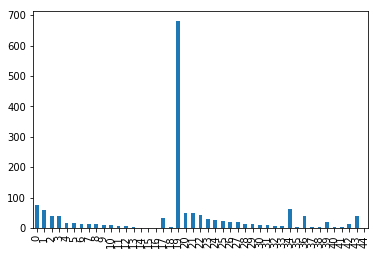

In [30]:
# reflist["Year"], reflist["Citations"]
# bar1 = reflist["Year"].value_counts()
# Create a data frame with one column, "ages"
reflist['Citations'].plot(kind="bar")


# Summary by Citations 

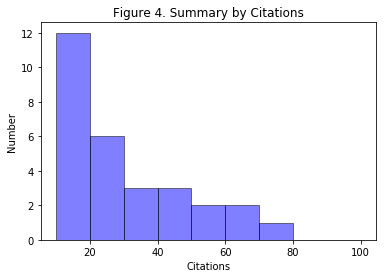

In [31]:
commute_times = reflist.Citations
bin_edges= [10,20,30,40,50,60,70,80,90,100]
ax = plt.hist(commute_times,
         bins=bin_edges,
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5)
plt.xlabel('Citations')
plt.ylabel('Number')
plt.title('Figure 4. Summary by Citations')



plt.show()

In [32]:
commute_times.count()

45

# Publication Summary by Year

In [33]:
# Standard plotly imports
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

reflist['Year'].iplot(kind='hist', xTitle='Year',
                  yTitle='Count', title='Figure 5. Summary by Publication Year')

# Summary by Journal and Conference Proceeding  

In [34]:
# Standard plotly imports
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

reflist['Journal'].iplot(kind='hist', xTitle='Journal',
                  yTitle='Count', title='Figure 3. Summary of publishers')

In [35]:
# Standard plotly imports
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

reflist['Settings'].iplot(kind='hist', xTitle='Settings',
                  yTitle='Count', title='Summary by Cases or Settings')

# Analysis of 45-Articles 

In [10]:
#Before web of science review it was 33 articles 
#fullreview = pd.read_csv("ReferenceData.csv", skipinitialspace = True, encoding='utf-8')

#after web of science review 
fullreview = pd.read_csv("ReferenceDataF1.csv", skipinitialspace = True, encoding='utf-8')

In [98]:
@interact
def show_referral_by_Citations(column="Citations",x=80):
    return fullreview.loc[fullreview[column] >x]

,Title,Author,Journal,Year,Citations,Settings,Techniques,Context,Mechanism_and_Intervention_strategies,Approaches,Platform,Outcome_and_Lesson,Possibility_to_adopt_in_LRS
19,Comparing computer-interpretable guideline mod...,Peleg et al. (2003),Journal of the American Medical Informatics As...,2003,681,cough and hypertension,Automation,Trying to build computer interpretable CGs,Compare six existing clinical knowledge repres...,Knowledge based,Standalone APP,Different model experimentation is performed t...,Yes


In [11]:
#repalcing values 
df = pd.read_csv("ReferenceDataF1.csv",skipinitialspace = True,encoding='utf-8')

#sample output

df.shape

(45, 13)

In [143]:
#repalacing a single value
#df.replace(to_replace=["Automating CGs"],
 #          value=["ACGs"],
  #         inplace=True
   #       )

In [144]:
#repalacing a single value
#df.replace(to_replace=['Knowledge based'], value=['KB'], inplace=True)

Text(0, 0.5, 'Studies')

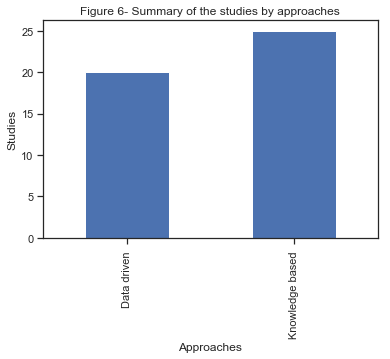

In [145]:
#df['Approaches'].value_counts().plot(kind='bar')

df.groupby('Approaches').size().plot(kind='bar',title='Figure 6- Summary of the studies by approaches')
plt.ylabel("Studies")

#Freq of values 
#df.groupby('Platform').count()

Text(0.5, 0, 'Platforms')

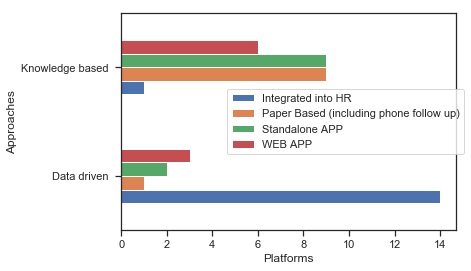

In [146]:
pd.crosstab(df['Approaches'],df['Platform']).plot.barh().legend(loc='center left', bbox_to_anchor=(0.3, 0.5))
plt.xlabel("Platforms")

Text(73.3020998263889, 0.5, 'Publication Year')

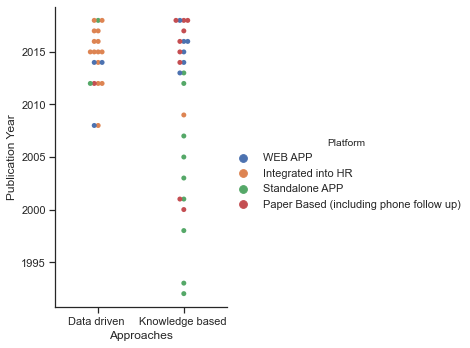

In [12]:
#The visulization of CP implmentation approaches and thier platform over the publicaiton years
sns.set(style="ticks", color_codes=True)

sns.catplot(x="Approaches", y="Year", hue="Platform",kind="swarm",aspect=0.8, data=df);
plt.ylabel("Publication Year")

In [148]:
#sns.lineplot(data=df, x="Year", y="Approaches")

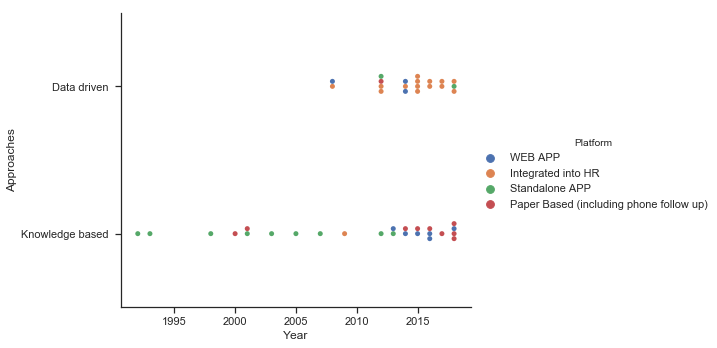

In [149]:
sns.catplot(x="Year", y="Approaches", hue="Platform", orient="h", aspect=1.5, kind="swarm",  data=df);

In [150]:
xx = df.groupby(['Year','Techniques','Platform']).size().reset_index().rename(columns={0:'Number_of_Studies'})
xx#.plot.bar()

,Year,Techniques,Platform,Number_of_Studies
0,1992,Automation,Standalone APP,1
1,1993,Automation,Standalone APP,1
2,1998,Automation,Standalone APP,1
3,2000,"Compare and contrast,follow up, review, interv...",Paper Based (including phone follow up),1
4,2001,Automation,Standalone APP,1
5,2001,"Compare and contrast,follow up, review, interv...",Paper Based (including phone follow up),1
6,2003,Automation,Standalone APP,1
7,2005,Automation,Standalone APP,1
8,2007,"Rule Based or Fuzzy rule, extended fuzzy Petri...",Standalone APP,1
9,2008,"Rule Based or Fuzzy rule, extended fuzzy Petri...",Integrated into HR,1


In [151]:
# xx['Techniques']
#repalacing a single value
df.replace(to_replace=["predicting the variance clinical pathway in acute decompensated heart failure"],
           value=["Neural network "],
           inplace=True
          )

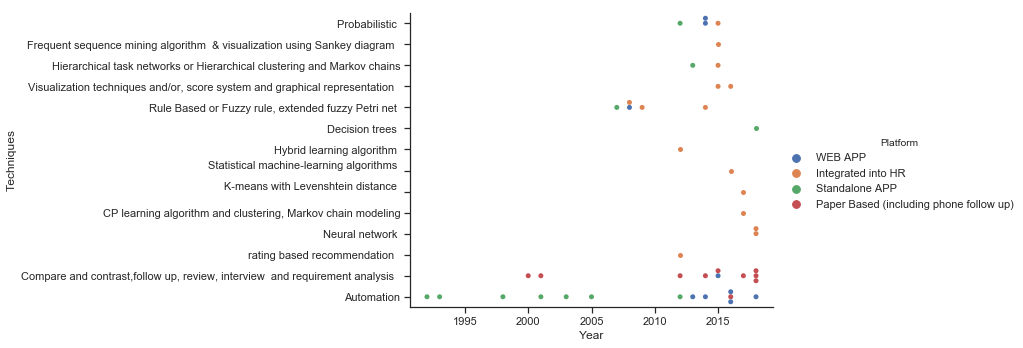

In [152]:
#The visulization of CP implmentation CP publisher wrt to year and journal citations 
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Year", y="Techniques",hue="Platform",kind="swarm", aspect=2.5, data=df);
#plt.title("Adoption of CP techniques and platform over the years")

In [165]:
xx = df.groupby(['Approaches','Platform', 'Techniques']).size().reset_index().rename(columns={0:'Number_of_Studies'})
xx#.to_csv('tocsv2021.csv')

,Approaches,Platform,Techniques,Number_of_Studies
0,Data driven,Integrated into HR,"CP learning algorithm and clustering, Markov c...",1
1,Data driven,Integrated into HR,Frequent sequence mining algorithm & visualiz...,1
2,Data driven,Integrated into HR,Hierarchical task networks or Hierarchical clu...,1
3,Data driven,Integrated into HR,Hybrid learning algorithm,1
4,Data driven,Integrated into HR,K-means with Levenshtein distance \n,1
5,Data driven,Integrated into HR,Neural network,2
6,Data driven,Integrated into HR,Probabilistic,1
7,Data driven,Integrated into HR,"Rule Based or Fuzzy rule, extended fuzzy Petri...",2
8,Data driven,Integrated into HR,Statistical machine-learning algorithms \n,1
9,Data driven,Integrated into HR,"Visualization techniques and/or, score system ...",2


In [160]:
pd.crosstab(df['Techniques'],df['Platform']).color='yellow'

In [154]:
df['Techniques'].value_counts(normalize=True) * 100

Automation                                                                       28.888889
Compare and contrast,follow up, review, interview  and requirement analysis      22.222222
Rule Based or Fuzzy rule, extended fuzzy Petri net                               11.111111
Probabilistic                                                                     8.888889
Visualization techniques and/or, score system and graphical representation        4.444444
Hierarchical task networks or Hierarchical clustering and Markov chains           4.444444
Neural network                                                                    4.444444
Statistical machine-learning algorithms \n                                        2.222222
CP learning algorithm and clustering, Markov chain modeling                       2.222222
Frequent sequence mining algorithm  & visualization using Sankey diagram          2.222222
K-means with Levenshtein distance \n                                              2.222222

Text(0.5, 0, 'Techniques')

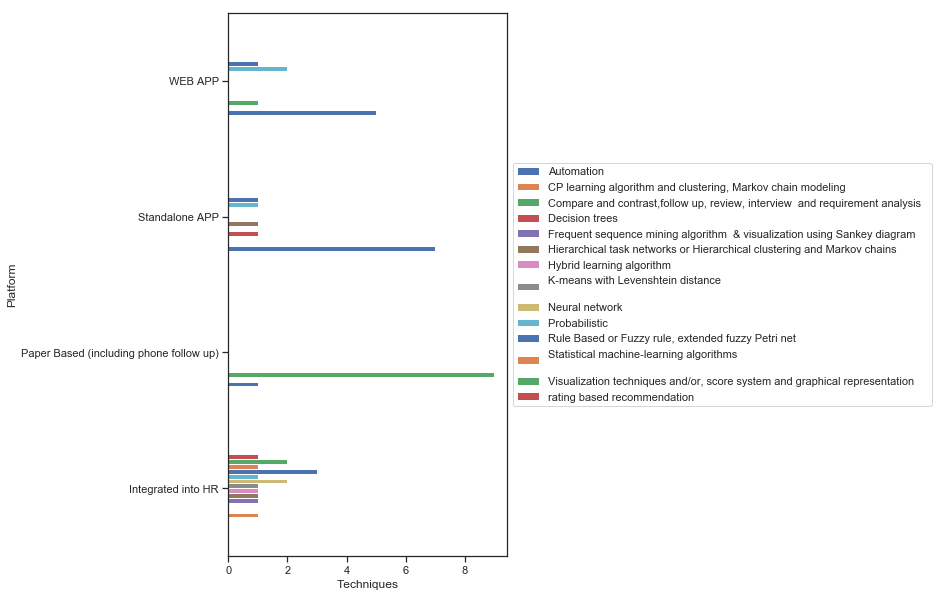

In [155]:
pd.crosstab(df['Platform'],df['Techniques']).plot.barh(figsize=(5,10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Techniques")

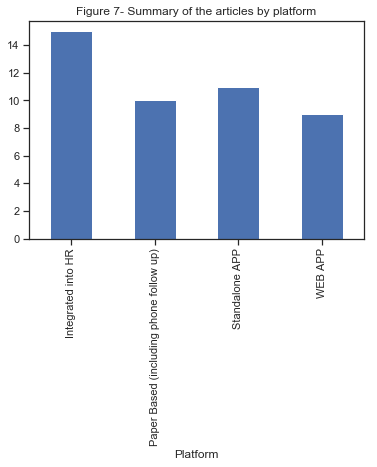

In [156]:
#repalacing a single value
df.replace(to_replace=['NaN','-'],
           value=['Not mentioned','Not mentioned'],
           inplace=True
          )
df.groupby('Platform').size().plot(kind='bar',title='Figure 7- Summary of the articles by platform')

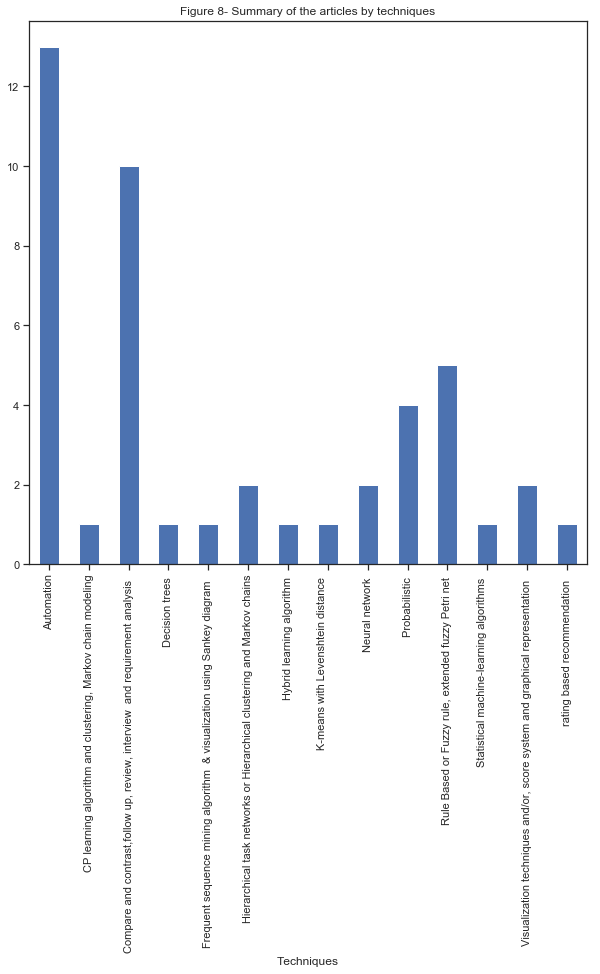

In [157]:
df.groupby('Techniques').size().plot(kind='bar',figsize=(10,10),title='Figure 8- Summary of the articles by techniques')

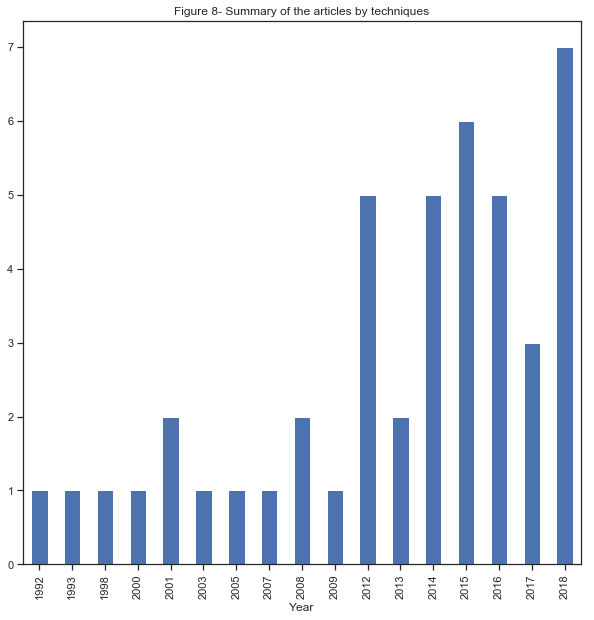

In [158]:
df.groupby('Year').size().plot(kind='bar',figsize=(10,10),title='Figure 8- Summary of the articles by techniques')

In [15]:
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

fullreview['Citations'].iplot(kind='hist', xTitle='Citations',
                  yTitle='Count', title='Citations')

NameError: name 'fullreview' is not defined

In [16]:
# pd.crosstab(df['Citations'],df['Year'])#.stack() 
cols = ['Citations' ,'Year' ]
df = pd.DataFrame(df,columns = cols)
df.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'}, annot = True)

,Citations,Year
0,76,2014
1,60,2015
2,39,2015
3,38,2015
4,18,2012
5,15,2015
6,14,2008
7,13,2014
8,12,2008
9,11,2018
